In [1]:
import pandas as pd
import polars as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from matplotlib.colors import to_rgba
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import torch

# TDC Dept


In [2]:
TDC_Dept_ABC = pd.read_csv('TDC_Dept_Segmentado_ABC.csv')
# TDC_Dept_ABC = pl.read_csv('TDC_Dept_Segmentado_ABC.csv')

In [5]:
TDC_Dept_ABC[1000:1010]

Socio,Mob,Saldo_total,Saldo_Mes,Pago_minimo_M0,Utilizacion,Pago_M0,Limite_credito,Genero,ESTADO,Behavior,Saldo_total_M1,Saldo_total_M2,Saldo_total_M3,Saldo_total_M4,Saldo_total_M5,Saldo_total_M6,Saldo_Mes_M1,Saldo_Mes_M2,Saldo_Mes_M3,Saldo_Mes_M4,Saldo_Mes_M5,Saldo_Mes_M6,Pago_minimo_M1,Pago_minimo_M2,Pago_minimo_M3,Pago_minimo_M4,Pago_minimo_M5,Pago_minimo_M6,Utilizacion_M1,Utilizacion_M2,Utilizacion_M3,Utilizacion_M4,Utilizacion_M5,Utilizacion_M6,Behavior_M1,Behavior_M2,Behavior_M3,Behavior_M4,Behavior_M5,Behavior_M6,Pago_M1,Pago_M2,Pago_M3,Pago_M4,Pago_M5,Pago_M6,Canal_Pago_M1,Canal_Pago_M2,Canal_Pago_M3,Canal_Pago_M4,Canal_Pago_M5,Canal_Pago_M6,Variable_objetivo,dias_deudados_m6,dias_deudados_m5,dias_deudados_m4,dias_deudados_m3,dias_deudados_m2,dias_deudados_m1,dias_deudados_m0,Edad,Variable_Objetivo_m6,Variable_Objetivo_m5,Variable_Objetivo_m4,Variable_Objetivo_m3,Variable_Objetivo_m2,Variable_Objetivo_m1,L2_Saldo_Mes,L2_Pago,Segmento_ABC
str,i64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,str
"""SUB""",116,10961.96,10061.26,1861.35,1.557097,1400.0,7040.0,"""F""","""EM""",606.0,9634.36,9552.61,8871.38,8830.04,8792.17,null,8552.26,8303.85,7469.48,7287.44,7120.31,null,855.22,1077.34,746.95,740.78,712.03,null,1.368517,1.356905,1.260139,1.254267,1.248888,0.0,581.0,639.0,643.0,672.0,665.0,661.0,0.0,1100.0,500.0,741.0,700.0,0.0,null,"""Suburbia""","""Suburbia""","""Suburbia""","""Suburbia""",null,0,0,0,0,0,-3,-34,-2,61,0,0,0,0,0,0,20072.93592,1580.84819,"""A"""
"""SUB""",103,9922.94,9463.44,1763.23,1.127607,null,8800.0,"""F""","""EM""",659.0,8667.37,7959.61,8032.4,8075.01,8038.81,7690.79,8168.84,7587.09,7601.04,7098.59,6819.86,5860.08,816.88,758.71,760.11,709.86,1056.84,586.99,0.984928,0.904501,0.912773,0.917615,0.913501,0.873953,652.0,654.0,654.0,661.0,663.0,662.0,0.0,759.0,768.0,710.0,1057.0,587.0,null,"""Prosa / Interbancario""","""Prosa / Interbancario""","""Prosa / Interbancario""","""Prosa / Interbancario""","""Prosa / Interbancario""",0,-1,-1,3,-1,-1,-31,-61,40,0,0,0,0,0,0,20071.556874,1769.695737,"""A"""
"""SUB""",105,9040.07,9040.07,1694.63,2.226618,null,4060.0,"""M""","""PUE""",590.0,7858.09,9577.06,8256.88,6460.77,5779.42,5691.01,7858.09,9577.06,8256.88,6460.77,5779.42,4914.97,790.74,2491.26,1535.13,710.89,1385.63,1310.3,1.93549,1.179441,1.016857,0.795661,0.711751,0.840622,null,600.0,661.0,663.0,668.0,675.0,0.0,2500.0,0.0,0.0,1500.0,1350.0,null,"""Santander""",null,null,"""Santander""","""BBVA""",0,0,-6,-60,-31,-1,-31,-61,51,0,0,0,0,0,0,20066.60819,3212.864765,"""A"""
"""SUB""",99,10768.82,10768.82,3111.08,1.49775,null,7190.0,"""F""","""DF""",592.0,9321.77,8105.27,7289.99,5199.14,5119.5,5261.87,9321.77,8105.27,7289.99,5199.14,5119.5,5261.87,2075.85,1185.32,729.0,519.91,511.95,526.19,1.296491,1.127298,1.013907,0.723107,0.925769,0.951514,668.0,666.0,683.0,683.0,679.0,673.0,0.0,0.0,1900.0,650.0,600.0,600.0,null,null,"""Suburbia""","""Suburbia""","""Suburbia""","""Suburbia""",0,2,2,5,21,-9,-39,-69,40,0,0,0,0,0,0,20065.638514,2180.022936,"""A"""
"""CYA""",81,10727.98,10727.98,2137.89,1.219089,null,8800.0,"""M""","""NAY""",649.0,9392.84,9068.35,9143.94,6868.29,3769.8,2072.23,9392.84,8718.02,8165.95,6313.63,3769.8,1570.78,1005.89,933.97,879.72,724.94,928.95,697.64,1.067368,1.030494,1.039084,0.7804875,0.428386,0.235481,656.0,658.0,671.0,692.0,688.0,680.0,0.0,950.0,900.0,1000.0,930.0,1571.0,null,"""BBVA""","""BBVA""","""C&A""","""BBVA""","""BBVA""",0,0,-1,13,0,0,-30,-60,46,0,0,0,0,0,0,20063.45623,2458.747852,"""A"""
"""CYA""",174,9691.34,9528.04,1754.0,1.101289,null,8800.0,"""F""","""EM""",639.0,8552.4,8585.36,7937.87,7953.64,8075.36,6670.67,8006.74,7669.31,7360.42,7093.6,6942.05,5999.26,801.0,767.0,737.0,710.0,781.0,687.0,0.971864,0.975609,0.902031,0.903823,0.917655,0.758031,623.0,623.0,623.0,623.0,6

## get_dummies para Segmento_ABC


In [4]:
# one hot encode del segmento ABC
TDC_Dept_dummy = pd.get_dummies(TDC_Dept_ABC['Segmento_ABC'], drop_first=True, dtype=int)
# TDC_Dept_dummy = TDC_Dept_ABC.select(pl.col("Segmento_ABC").to_dummies(drop_first=True).cast(pl.Int32))

In [5]:
# ========================== PROBAMOS CON DIFERENTES VARIABLE PARA EL MODELO LINEAL ==========================

# =============== SOLO USAMOS LOS SEGMENTOS ABC ===============
x = np.column_stack((np.ones(len(TDC_Dept_dummy)), TDC_Dept_dummy['B'], TDC_Dept_dummy['C']))

# =============== SOLO USAMOS LOS SEGMENTOS ABC + NORMA SALDO MES ===============
# x = np.column_stack((np.ones(len(TDC_Dept_dummy)), TDC_Dept_dummy['B'], TDC_Dept_dummy['C'], TDC_Dept_ABC['L2_Saldo_Mes']))

# =============== SOLO USAMOS LOS SEGMENTOS ABC + VARIABLE_OBJETIVO_Mi ===============
# x = np.column_stack((np.ones(len(TDC_Dept_dummy)), TDC_Dept_dummy['B'], TDC_Dept_dummy['C'], TDC_Dept_ABC['Variable_Objetivo_m6'], TDC_Dept_ABC['Variable_Objetivo_m5'], TDC_Dept_ABC['Variable_Objetivo_m4'], TDC_Dept_ABC['Variable_Objetivo_m3'], TDC_Dept_ABC['Variable_Objetivo_m2'], TDC_Dept_ABC['Variable_Objetivo_m1']))

# ===============!! VARIABLE OBJETIVO !!===============
# Y = np.array(TDC_Dept_ABC['L2_Pago'])


## Logistic Regresion
Let's create a function to test different combinations of variables and compare their MSE using the data we have. We'll use sklearn to build Logistic models and calculate Accuracy and AUC for each combination of regressors.

In [6]:
Y = np.array(TDC_Dept_ABC['Variable_objetivo'])

Testing combinations with 1 features: ['dias_deudados_m1']
Testing combinations with 1 features: ['dias_deudados_m2']
Testing combinations with 1 features: ['Variable_Objetivo_m1']
Testing combinations with 1 features: ['Variable_Objetivo_m2']
Testing combinations with 1 features: ['B']
Testing combinations with 1 features: ['C']
Testing combinations with 2 features: ['dias_deudados_m1', 'dias_deudados_m2']
Testing combinations with 2 features: ['dias_deudados_m1', 'Variable_Objetivo_m1']
Testing combinations with 2 features: ['dias_deudados_m1', 'Variable_Objetivo_m2']
Testing combinations with 2 features: ['dias_deudados_m1', 'B']
Testing combinations with 2 features: ['dias_deudados_m1', 'C']
Testing combinations with 2 features: ['dias_deudados_m2', 'Variable_Objetivo_m1']
Testing combinations with 2 features: ['dias_deudados_m2', 'Variable_Objetivo_m2']
Testing combinations with 2 features: ['dias_deudados_m2', 'B']
Testing combinations with 2 features: ['dias_deudados_m2', 'C']
T

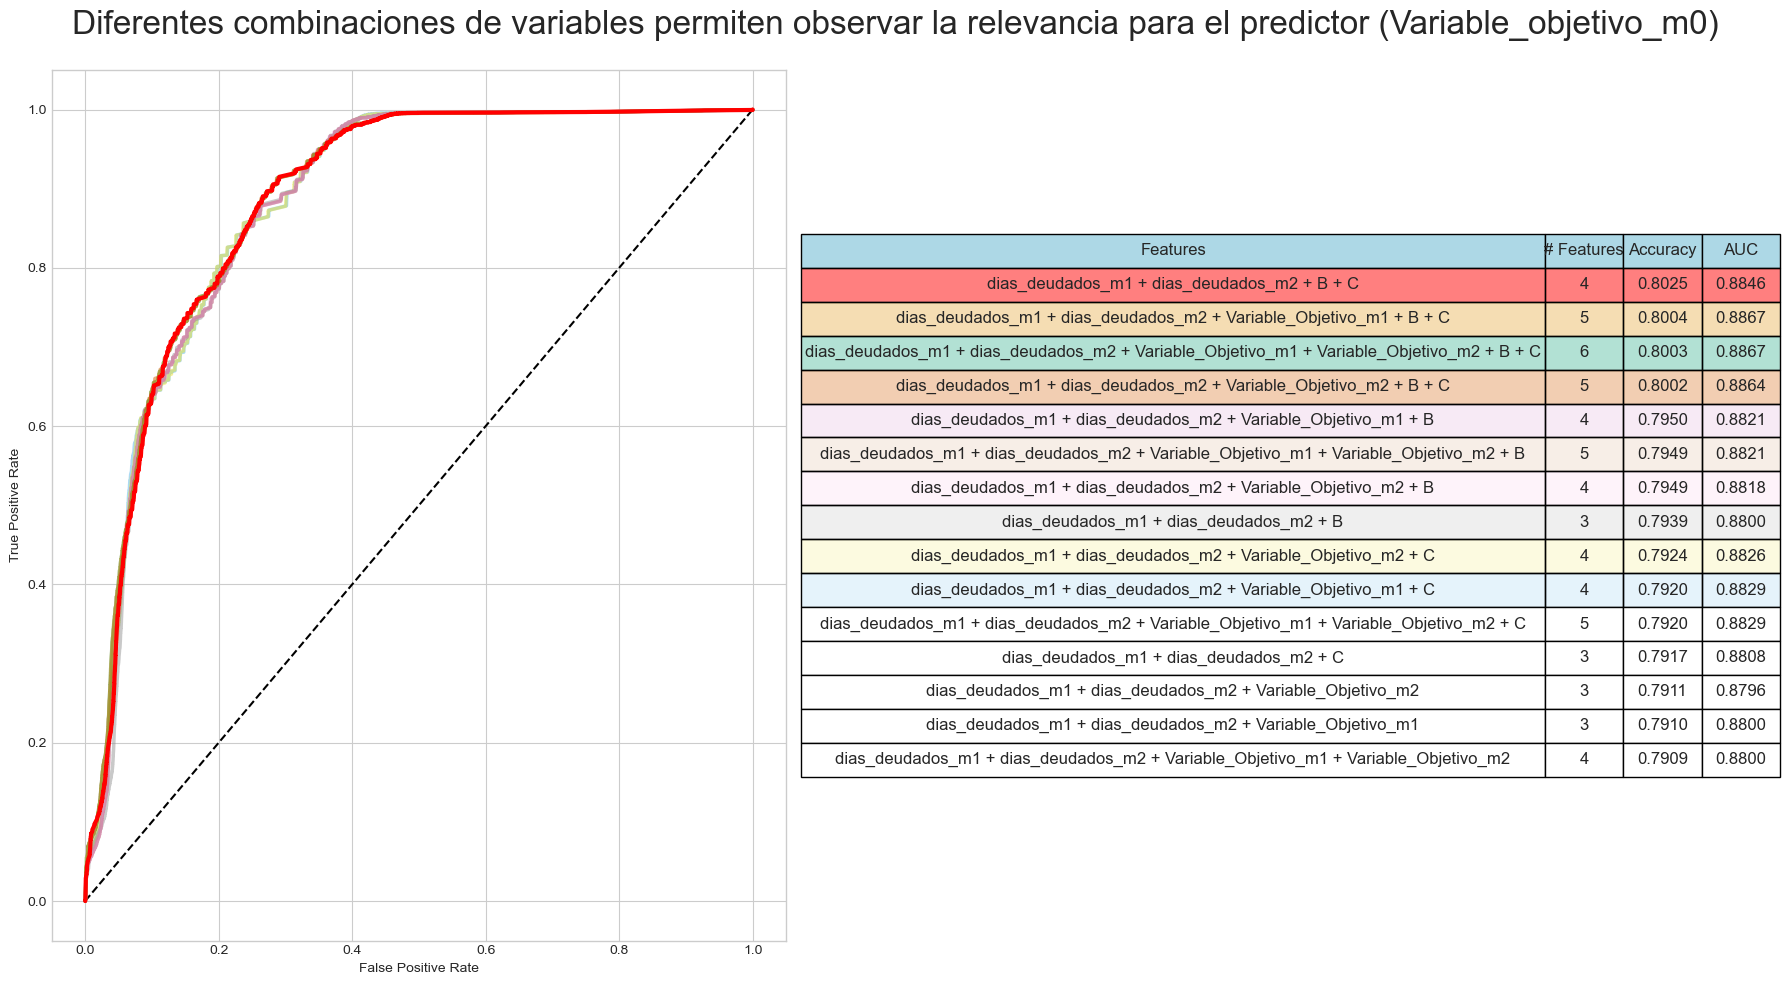

<Figure size 640x480 with 0 Axes>

In [7]:
# Set style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")

# Define potential features (same as in your original script)
features = [
            'dias_deudados_m1', 'dias_deudados_m2',
            'Variable_Objetivo_m1', 'Variable_Objetivo_m2',
            'B', 'C'
           ]

# Initialize list to store results
results = []
roc_data = {}  # To store ROC curve data for each combination

# Assuming TDC_Dept_ABC and TDC_Dept_dummy are already defined
# And Y is your target variable (should be binary for logistic regression)
All_col = pd.concat([TDC_Dept_ABC, TDC_Dept_dummy], axis=1)

# Test different combinations of features
for r in range(1, len(features) + 1):
    for feature_combo in combinations(features, r):
        # Prepare feature matrix, ensuring features exist in All_col
        valid_features = [f for f in feature_combo if f in All_col.columns]
        if not valid_features:
            continue

        print(f"Testing combinations with {r} features: {valid_features}")
        combination_name = " + ".join(valid_features)  # Create a name for this combination

        X = All_col[valid_features]

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

        # Train model with logistic regression
        model = LogisticRegression(max_iter=1000, random_state=42)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1
        y_pred = model.predict(X_test)  # Class predictions

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        try:
            auc = roc_auc_score(y_test, y_pred_proba)
            # Calculate ROC curve points with more thresholds for smoother curves
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba, drop_intermediate=False)  # Keep all points
            roc_data[combination_name] = {'fpr': fpr, 'tpr': tpr, 'auc': auc}
        except:
            auc = 0  # Handle cases where AUC can't be computed

        results.append({
            'features': combination_name,
            'num_features': len(valid_features),
            'accuracy': accuracy,
            'auc': auc
        })

# Convert results to DataFrame for easier handling
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='accuracy', ascending=False)

# Create figure for ROC curves and table
plt.figure(figsize=(18, 10))
gs = GridSpec(1, 2, width_ratios=[3, 4])

# Plot ROC curves on the left
ax1 = plt.subplot(gs[0, 0])
# Reference diagonal line (random classifier)
ax1.plot([0, 1], [0, 1], 'k--')

# Create a dictionary to map feature combinations to their accuracy for legend sorting
combo_accuracy = {row['features']: row['accuracy'] for _, row in results_df.iterrows()}

# Get top 10 combinations by accuracy for plotting
top_10_combos = results_df_sorted.head(10)['features'].tolist()

# Prepare colors for the top 10 combinations
# We'll use colorblind palette for most but red for the #1
color_palette = sns.color_palette("colorblind", 10)
colors = list(color_palette)
colors[0] = (1.0, 0.0, 0.0)  # Bright red for top 1

# Sort the ROC data by accuracy (descending)
sorted_roc_items = sorted(
    [(name, data) for name, data in roc_data.items() if name in top_10_combos],
    key=lambda x: combo_accuracy[x[0]],
    reverse=True
)

# Create a mapping from feature combination to its position in sorted list (for coloring)
combo_position = {name: i for i, (name, _) in enumerate(sorted_roc_items)}

# First plot all lines EXCEPT the top one (in reverse order so lower ranks are plotted first)
for i in range(len(sorted_roc_items)-1, 0, -1):
    name, data = sorted_roc_items[i]
    # Get the accuracy value for this combination
    acc = combo_accuracy[name]

    # Regular styling for non-top combinations
    color = colors[i]
    linewidth = 2.5
    alpha = 0.5

    # Plot with specified color but no legend
    ax1.plot(data['fpr'], data['tpr'], linewidth=linewidth, alpha=alpha, color=color)

# Now plot the top combination LAST so it appears on top
top_name, top_data = sorted_roc_items[0]
ax1.plot(top_data['fpr'], top_data['tpr'], linewidth=3.0, alpha=1.0, color=colors[0])

ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.grid(True)

# Create table on the right
ax2 = plt.subplot(gs[0, 1])
ax2.axis('off')  # Hide axes

# Format the table data
table_data = results_df_sorted.head(15)[['features', 'num_features', 'accuracy', 'auc']].copy()
table_data['accuracy'] = table_data['accuracy'].apply(lambda x: f'{x:.4f}')
table_data['auc'] = table_data['auc'].apply(lambda x: f'{x:.4f}')
table_data.columns = ['Features', '# Features', 'Accuracy', 'AUC']

# Create the table with custom column widths
table = ax2.table(cellText=table_data.values,
                 colLabels=table_data.columns,
                 loc='center',
                 cellLoc='center',
                 colColours=['#ADD8E6']*len(table_data.columns))

# Adjust column widths - make numerical columns narrower
col_widths = [0.76, 0.08, 0.08, 0.08]  # Name of Features, # Features, Accuracy, AUC
for (row, col), cell in table.get_celld().items():
    if col == 0:  # Features column
        cell.set_width(col_widths[0])
    elif col == 1:  # # Features column
        cell.set_width(col_widths[1])
    elif col == 2:  # Accuracy column
        cell.set_width(col_widths[2])
    elif col == 3:  # AUC column
        cell.set_width(col_widths[3])

    # Set cell colors based on rank
    if row == 0:  # Header row
        continue

    feature_name = table_data.iloc[row-1, 0]  # Get feature name for this row

    # Check if this feature is in our top 10
    if feature_name in combo_position:
        pos = combo_position[feature_name]

        # For top 1: use brighter red
        if pos == 0:
            # Convert the RGB tuple to a hex color with alpha
            rgb_color = colors[pos]
            # Make it lighter for the table (more transparent)
            rgba_color = to_rgba(rgb_color, 0.5)  # 0.5 alpha for the table
            cell.set_facecolor(rgba_color)
        # For positions 1-3 (top 2-4): use medium highlight
        elif 1 <= pos <= 3:
            rgb_color = colors[pos]
            rgba_color = to_rgba(rgb_color, 0.3)  # 0.3 alpha for positions 2-4
            cell.set_facecolor(rgba_color)
        # For other top 10: use very light highlight
        elif pos < 10:
            rgb_color = colors[pos]
            rgba_color = to_rgba(rgb_color, 0.15)  # 0.15 alpha for positions 5-10
            cell.set_facecolor(rgba_color)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.8)

plt.suptitle('Diferentes combinaciones de variables permiten observar la relevancia para el predictor (Variable_objetivo_m0)', fontsize=24)
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Show the plot
plt.show()

plt.tight_layout()
plt.show()

## Regresion Lineal Simple

In [8]:
TDC_Dept_ABC['Pago_M0'] = TDC_Dept_ABC['Pago_M0'].fillna(0)

In [9]:
Y = np.array(TDC_Dept_ABC['L2_Pago'])

In [10]:
# Define potential features (same as in your original script)
features = [
            'dias_deudados_m1', 'dias_deudados_m2', 'dias_deudados_m3', 'dias_deudados_m4', 'dias_deudados_m5', 'dias_deudados_m6',
            # 'Variable_Objetivo_m1', 'Variable_Objetivo_m2', 'Variable_Objetivo_m3', 'Variable_Objetivo_m4', 'Variable_Objetivo_m5', 'Variable_Objetivo_m6',
             'L2_Saldo_Mes',
            'B', 'C'
           ]
# Initialize list to store results
results = []

# And Y is your target variable (should be binary for logistic regression)
All_col = pd.concat([TDC_Dept_ABC, TDC_Dept_dummy], axis=1)
# Test different combinations of features
for r in range(1, len(features) + 1):
    for feature_combo in combinations(features, r):
        # Prepare feature matrix, ensuring features exist in All_col
        valid_features = [f for f in feature_combo if f in All_col.columns]
        if not valid_features:
            continue

        print(f"Testing combinations with {r} features: {valid_features}")
        combination_name = " + ".join(valid_features)  # Create a name for this combination

        X = All_col[valid_features]

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

        # Train model with linear regression instead of logistic regression
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)  # Continuous predictions

        # Calculate metrics appropriate for regression
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results.append({
            'features': combination_name,
            'num_features': len(valid_features),
            'mse': mse,
            'rmse': rmse,
            'r2': r2,
            'mae': mae
        })

# Convert the results list to a DataFrame for easier manipulation
results_df = pd.DataFrame(results)

# Sort the DataFrame by R-squared value in descending order (higher is better)
sorted_results = results_df.sort_values(by='r2', ascending=False)

# Get the top 10 combinations
top_10 = sorted_results.head(10)

# Print the top 10 with formatted output
print("Top 10 Feature Combinations by R-squared:\n")
print("-" * 110)

for i, (_, row) in enumerate(top_10.iterrows(), 1):
    print(f"{i:.<5} {row['features']:<70}"
          f"\nnum_features: {row['num_features']}, r2: {row['r2']:.4f}, rmse: {row['rmse']:.4f}, mae: {row['mae']:.4f}")

Testing combinations with 1 features: ['dias_deudados_m1']
Testing combinations with 1 features: ['dias_deudados_m2']
Testing combinations with 1 features: ['dias_deudados_m3']
Testing combinations with 1 features: ['dias_deudados_m4']
Testing combinations with 1 features: ['dias_deudados_m5']
Testing combinations with 1 features: ['dias_deudados_m6']
Testing combinations with 1 features: ['L2_Saldo_Mes']
Testing combinations with 1 features: ['B']
Testing combinations with 1 features: ['C']
Testing combinations with 2 features: ['dias_deudados_m1', 'dias_deudados_m2']
Testing combinations with 2 features: ['dias_deudados_m1', 'dias_deudados_m3']
Testing combinations with 2 features: ['dias_deudados_m1', 'dias_deudados_m4']
Testing combinations with 2 features: ['dias_deudados_m1', 'dias_deudados_m5']
Testing combinations with 2 features: ['dias_deudados_m1', 'dias_deudados_m6']
Testing combinations with 2 features: ['dias_deudados_m1', 'L2_Saldo_Mes']
Testing combinations with 2 featu